In [5]:
from google.colab import files 
uploaded = files.upload()

Saving cancer.csv to cancer (1).csv


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import math

In [14]:
df=pd.read_csv('cancer.csv',index_col=0)
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df=df.drop(['diagnosis'], 1)
data = np.array(df.astype(float))

In [31]:
class K_Means:
	def __init__(self,k,it):
		self.k=k
		self.centroids={}
		self.max_itration=it

	def fit(self,data):
		#Randomly picking initial centroids
		index = np.random.choice(data.shape[0], self.k, replace=False)
		for i in range(self.k):
			self.centroids[i]=data[index[i]]

		for it in range(self.max_itration):
			self.clusters={}
			for i in range(self.k):
				self.clusters[i]=[]

			for x in data:
				dist=[]
				#Calculate euclidean distance of every data point x in data to each of the centroids
				for c in self.centroids:
					dist.append(np.linalg.norm(x-self.centroids[c]))
					#dist.append(np.linalg.norm(x-self.centroids[c]))
				#Finds the cluster index s.t x is at minimum distance from it
				cluster_index=dist.index(min(dist))
				#associating point to cluster center at minimum distance 
				self.clusters[cluster_index].append(x)

			old_centroids=dict(self.centroids)
			#updating new centroids
			for ind in self.clusters:
				self.centroids[ind]=np.average(self.clusters[ind],axis=0)

			

			#If both old and new centroids are same then break 
			flag=True
			for cent_ind in self.centroids:
				compare=self.centroids[cent_ind]==old_centroids[cent_ind]
				if compare.all()==False:
					flag=False
					break

			if flag==True:
				print("Convergence Acheived at "+str(it) + "th Iteration")
				break

			if it==(self.max_itration-1):
				print("Max Iteration Reached")
		

	def plot(self):
		colors=["c","b"]
		#Plotting the cluster points
		for c_ind in self.clusters:
			for point in self.clusters[c_ind]:
				plt.scatter(point[0], point[1],
				marker="o", color=colors[c_ind], s=2)
		#Plotting the centroids
		for c in self.centroids:
			plt.scatter(self.centroids[c][0], self.centroids[c][1],
				marker="o", color="k",s=20)
		plt.xlabel('radius_mean')
		plt.ylabel('texture_mean')
		plt.show()


	def details(self):
		print("No. of Points in each cluster : ")
		for c_ind in self.clusters:
			print(str(len(self.clusters[c_ind]))+" ",end="")
		print()




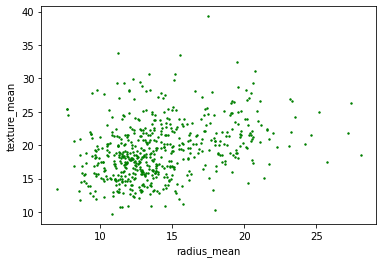

In [32]:
#Plotting all the data points
plt.xlabel('radius_mean')
plt.ylabel('texture_mean')
for point in data:
	plt.scatter(point[0],point[1],color='g',marker="o",s=2)
plt.show()

In [33]:
model=K_Means(2,50) #K=2, Max_Iterations
model.fit(data)
model.details()

Convergence Acheived at 6th Iteration
No. of Points in each cluster : 
131 438 


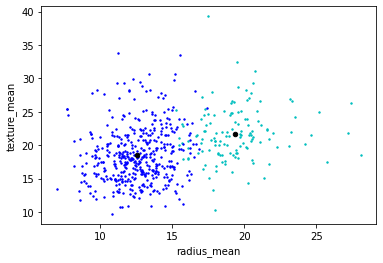

In [34]:
model.plot()